In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm



In [2]:
cars_df = pd.read_csv("cars_data_processed.csv")

In [3]:
cars_df.head(2)

,brand,model,price,address,year,mileage (km),num_owners,condition,modification,engine_volume,...,transmission,drive_type,body_type,color,Generation,Gen_Start,Gen_End,Horsepower,price_USD,price_EUR
0,Hyundai,Tucson,1800000,"Санкт-Петербург, Садовая ул., 26Ж",2021,8000,1,Не битый,2.5 AT,2.5,...,Автомат,Передний,Внедорожник 5-дверный,Серый,IV,2020,2025,190.0,20169.242354,19168.635002
1,LIFAN,Smily (320),140000,"Свердловская обл., Екатеринбург, пр-т Ленина",2012,175000,3,Не битый,1.3 MT,1.3,...,Механика,Передний,Хетчбек 5-дверный,Белый,320,2008,2015,88.0,1568.718850,1490.893833


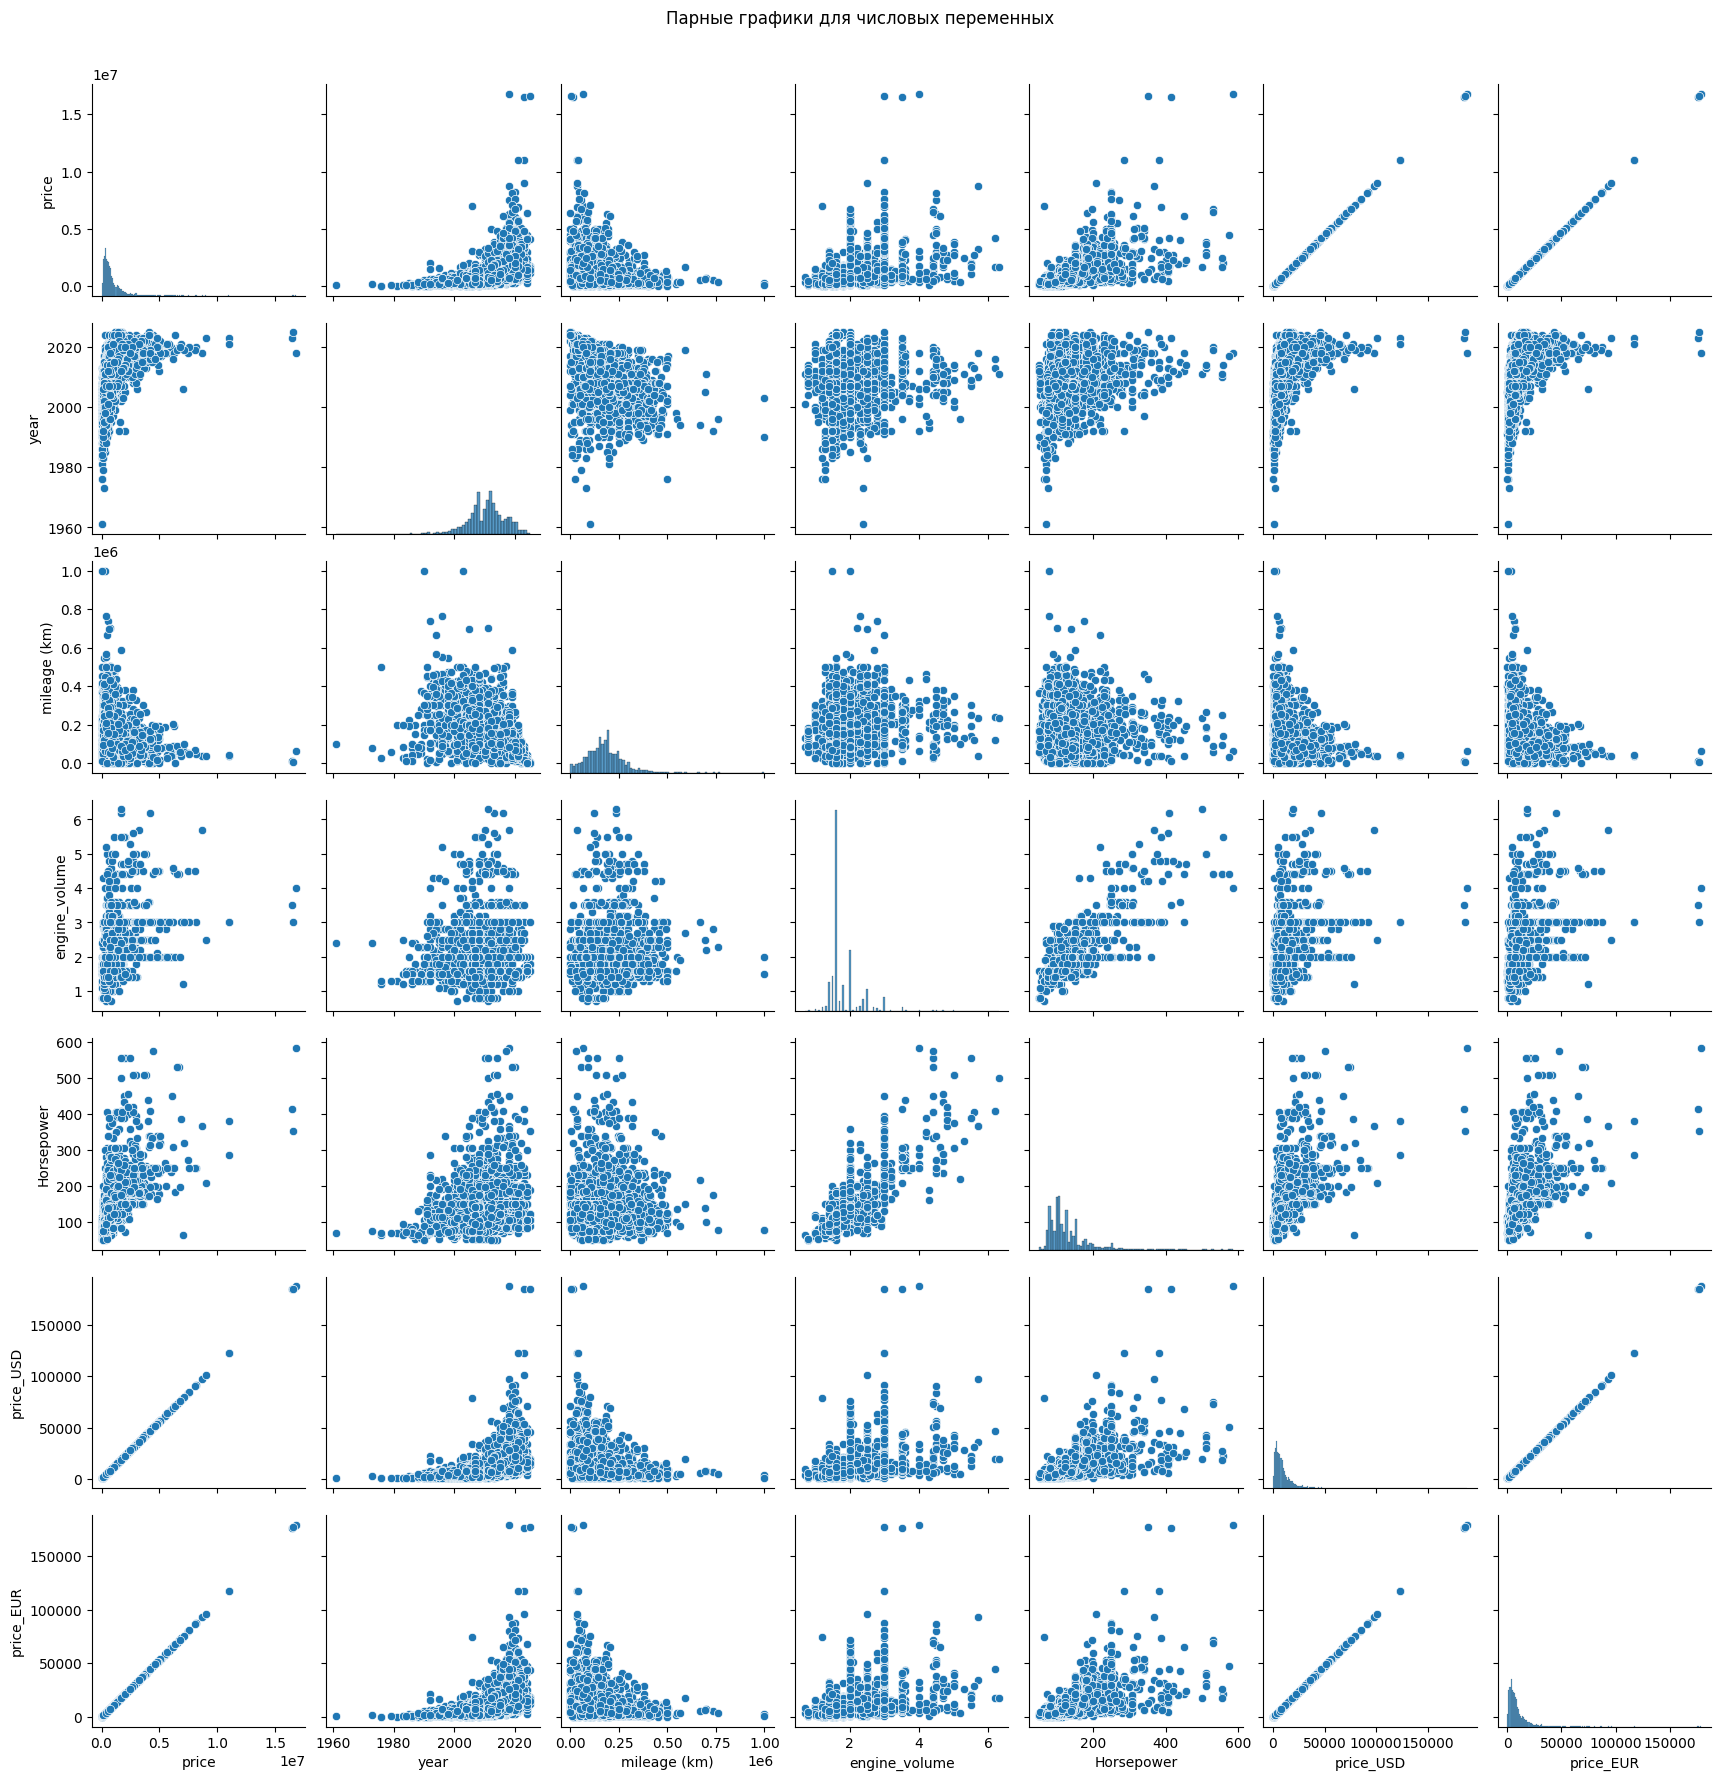

In [4]:
numeric_cols = ['price', 'year', 'mileage (km)', 'engine_volume', 'Horsepower', 'price_USD', 'price_EUR']
# Построим много парных графиков для выявления мультивариантных взаимосвязей
sns.pairplot(cars_df[numeric_cols])
plt.suptitle("Парные графики для числовых переменных", y=1.02)
plt.show()

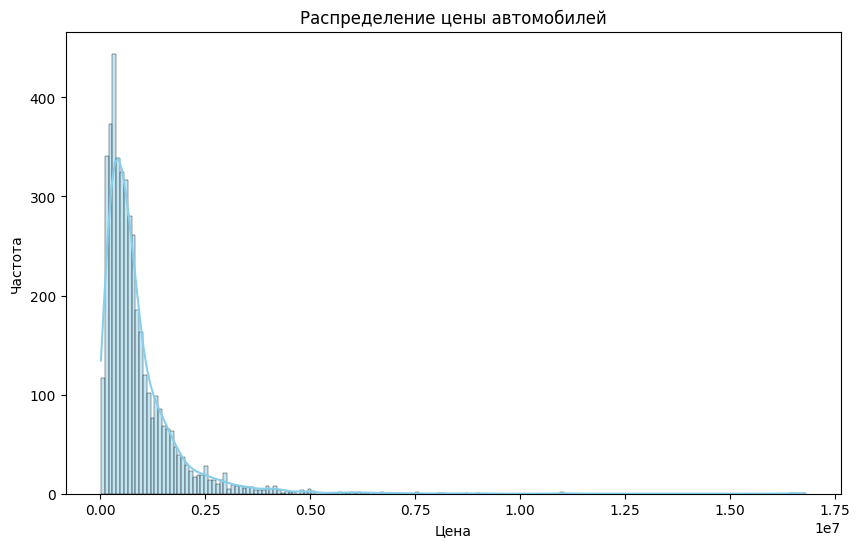

In [5]:
# Распределение цены автомобилей
plt.figure(figsize=(10,6))
sns.histplot(cars_df['price'], kde=True, color='skyblue')
plt.title("Распределение цены автомобилей")
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.show()

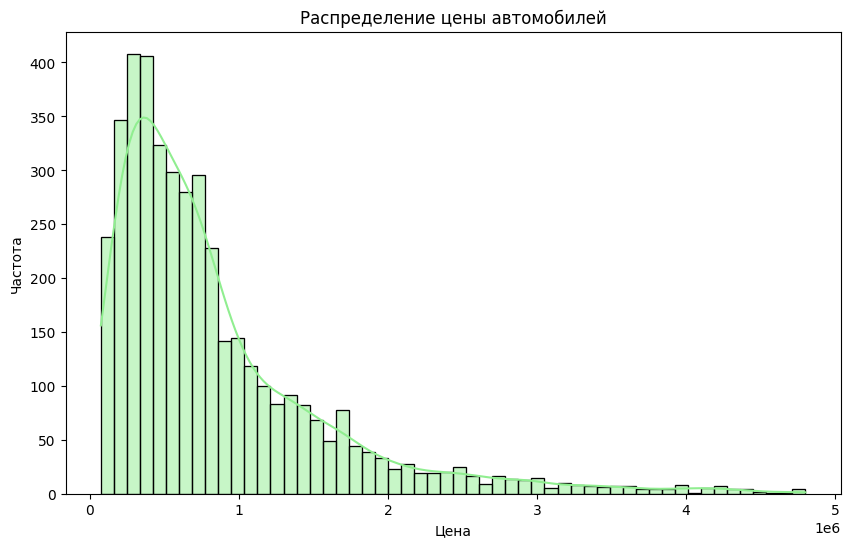

In [6]:
# Фильтрация выбросов по квантилям (оставляем 1%-99% данных)
q_low = cars_df['price'].quantile(0.01)
q_high = cars_df['price'].quantile(0.99)
cars_df_filtered = cars_df[(cars_df['price'] >= q_low) & (cars_df['price'] <= q_high)]

plt.figure(figsize=(10,6))
sns.histplot(cars_df_filtered['price'], kde=True, color='lightgreen')
plt.title("Распределение цены автомобилей")
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.show()

<ipython-input-16-592dbadd91d6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='viridis')


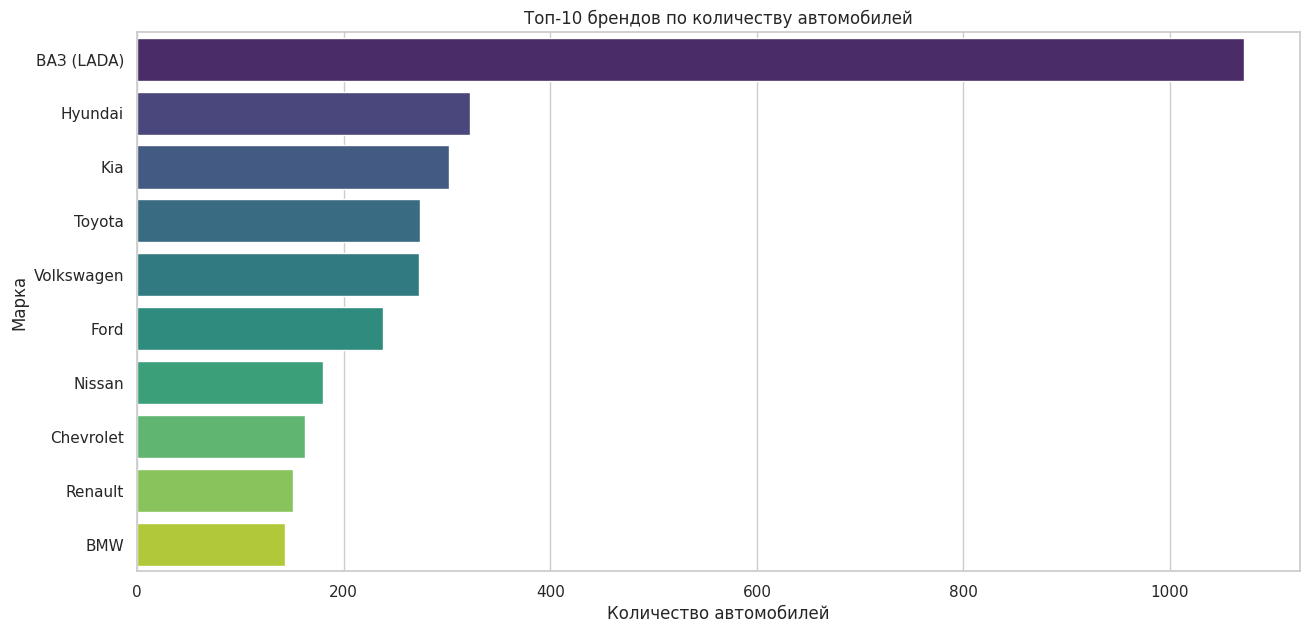

In [16]:
# топ-10 брендов по количеству автомобилей
plt.figure(figsize=(15, 7))
brand_counts = cars_df['brand'].value_counts().head(10)
sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='viridis')
plt.title('Топ-10 брендов по количеству автомобилей')
plt.xlabel('Количество автомобилей')
plt.ylabel('Марка')
plt.show()




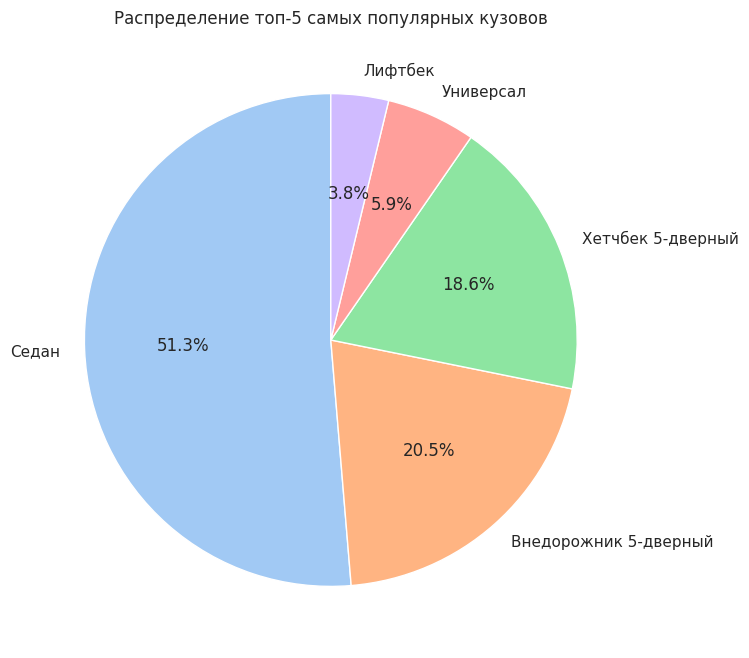

In [17]:
# топ-5 типов кузова
plt.figure(figsize=(10, 8))
body_type_counts_top5 = cars_df['body_type'].value_counts().head(5)
plt.pie(
    body_type_counts_top5,
    labels=body_type_counts_top5.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title('Распределение топ-5 самых популярных кузовов')
plt.show()

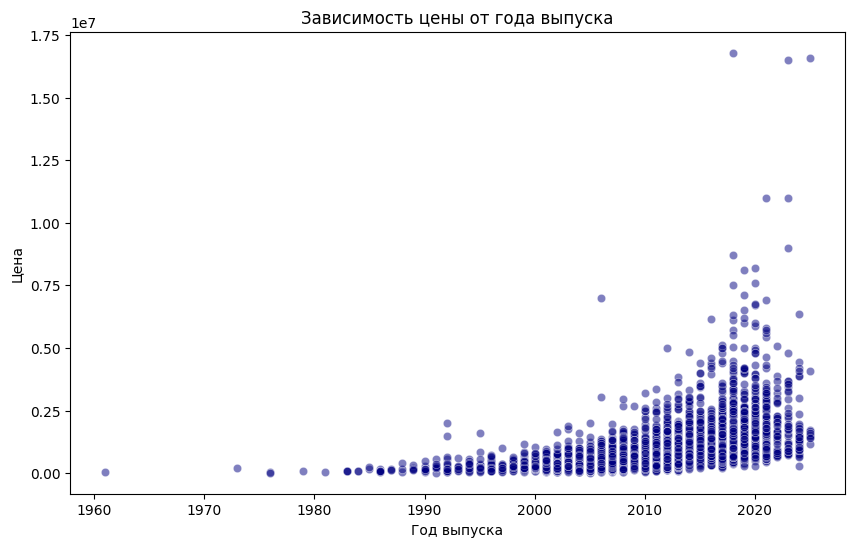

In [7]:
# Зависимость цены от года выпуска
plt.figure(figsize=(10,6))
sns.scatterplot(data=cars_df, x='year', y='price', alpha=0.5, color='navy')
plt.title("Зависимость цены от года выпуска")
plt.xlabel("Год выпуска")
plt.ylabel("Цена")
plt.show()

<ipython-input-46-ffbab07f7815>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-46-ffbab07f7815>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-46-ffbab07f7815>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-46-ffbab07f7815>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




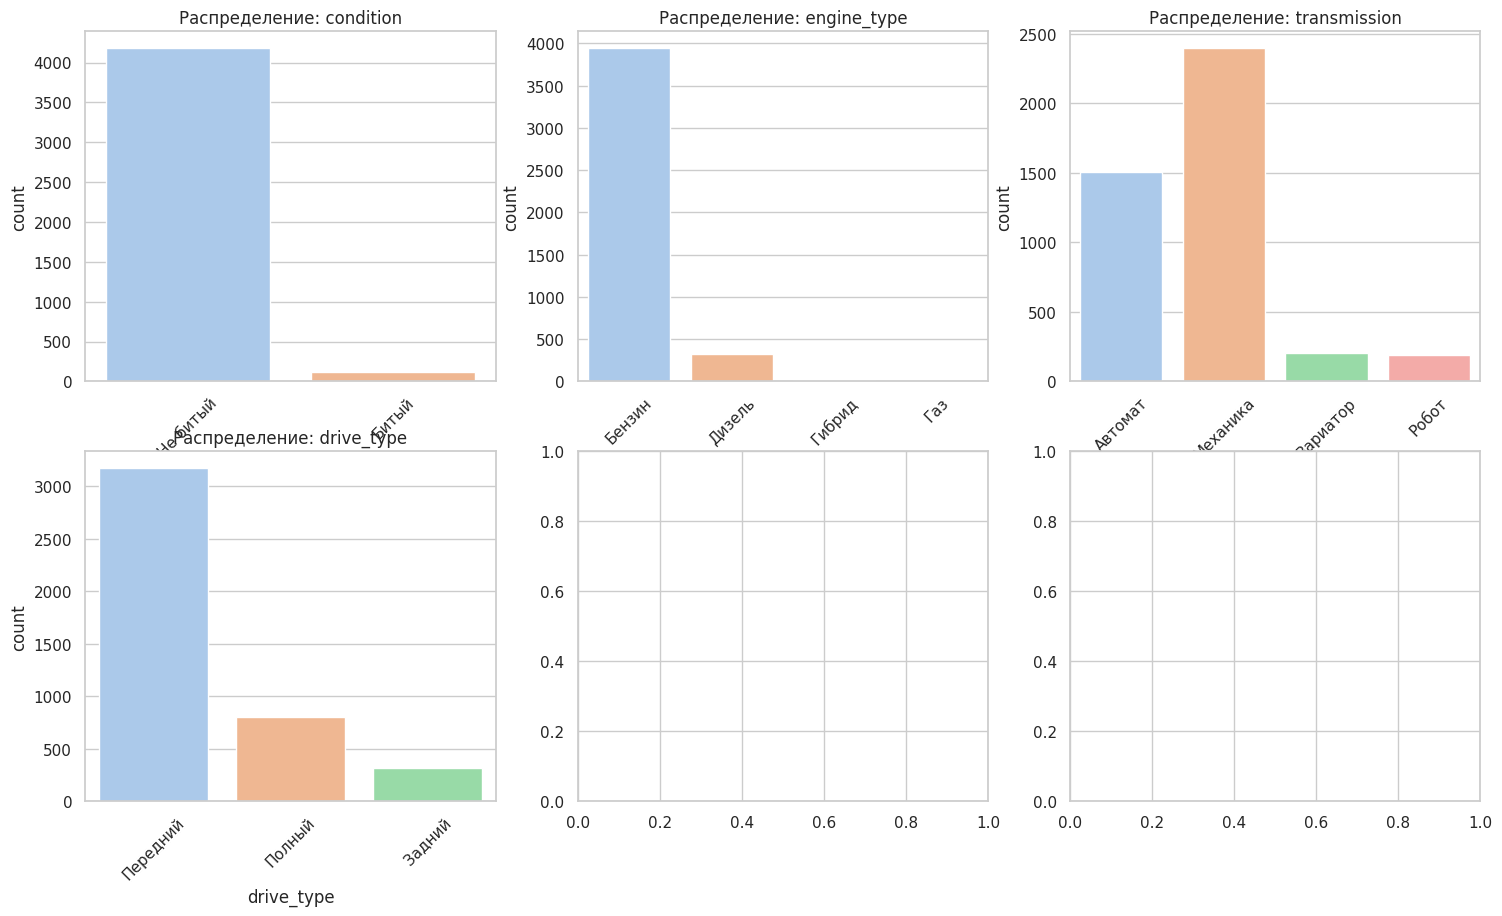

In [46]:
# Анализ категориальных признаков
categorical_vars = ['condition', 'engine_type', 'transmission', 'drive_type']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
for idx, col in enumerate(categorical_vars):
    sns.countplot(data=cars_df, x=col, ax=axes[idx], palette='pastel')
    axes[idx].set_title(f'Распределение: {col}')
    axes[idx].tick_params(axis='x', rotation=45)

# Скрываем лишние графики
for j in range(idx+1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

<ipython-input-11-d2daca515616>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top_filtered = df_top.groupby('brand', group_keys=False).apply(remove_outliers)
<ipython-input-11-d2daca515616>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_filtered, x='brand', y='price', order=order, palette="Set3")


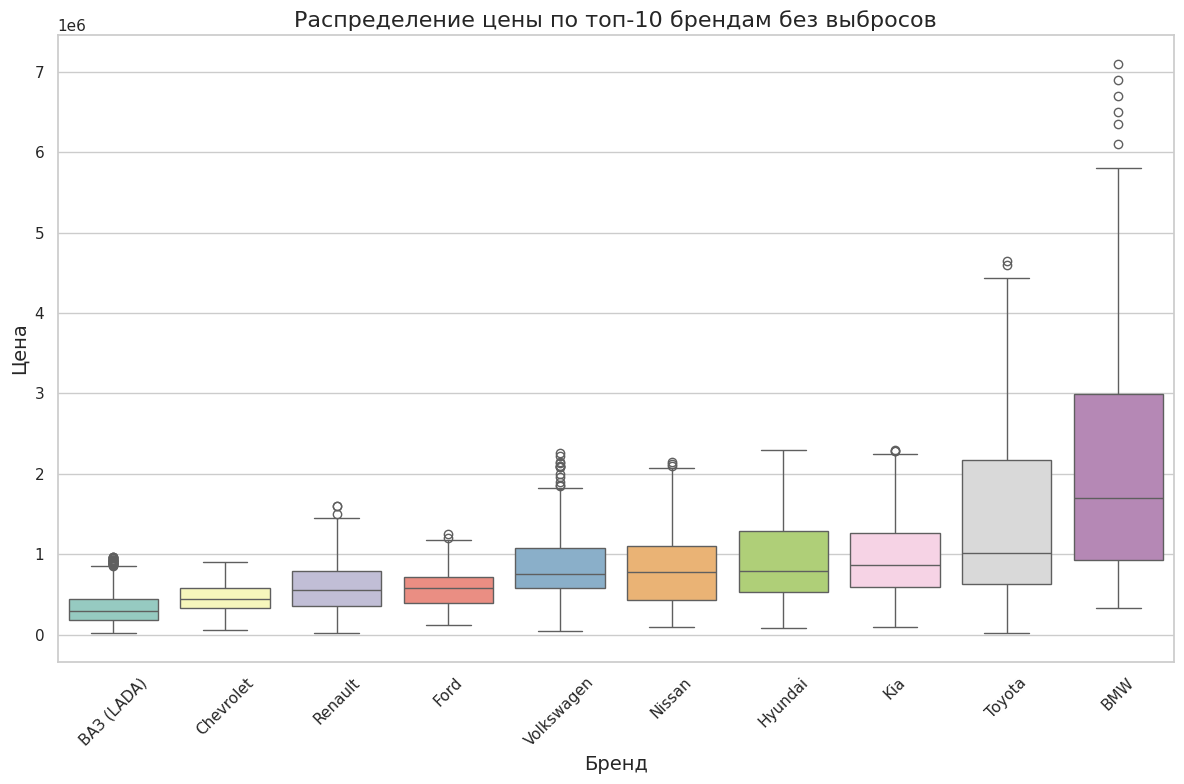

In [11]:
# Проанализируем цены брендов (топ 10 по частоте)
top_brands = cars_df['brand'].value_counts().nlargest(10).index
df_top = cars_df[cars_df['brand'].isin(top_brands)]

# удаление выбросов
def remove_outliers(group, threshold=1.5):
    q1 = group['price'].quantile(0.25)
    q3 = group['price'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return group[(group['price'] >= lower_bound) & (group['price'] <= upper_bound)]

df_top_filtered = df_top.groupby('brand', group_keys=False).apply(remove_outliers)
order = df_top_filtered.groupby('brand')['price'].median().sort_values().index

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.boxplot(data=df_top_filtered, x='brand', y='price', order=order, palette="Set3")
plt.title("Распределение цены по топ-10 брендам без выбросов", fontsize=16)
plt.xlabel("Бренд", fontsize=14)
plt.ylabel("Цена", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-47-2122af64253c>:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

<ipython-input-47-2122af64253c>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




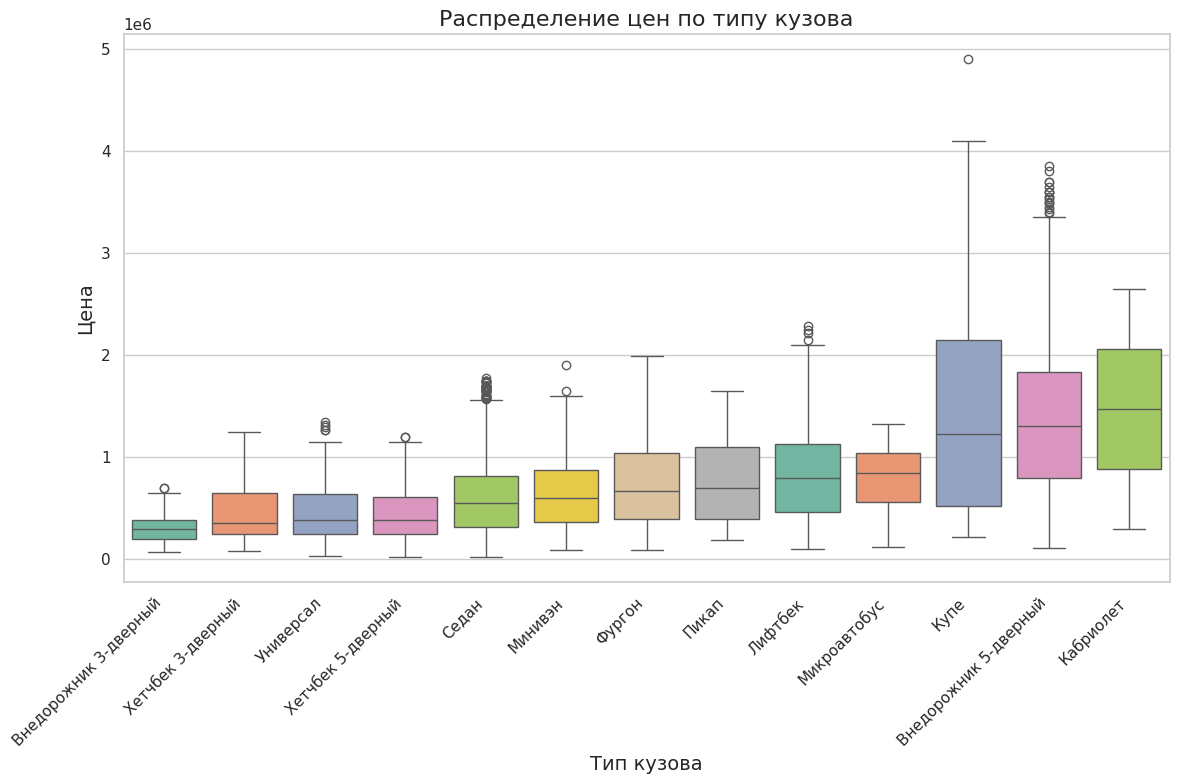

In [47]:
df_body_filtered = cars_df.groupby('body_type', group_keys=False).apply(remove_outliers)
order = df_body_filtered.groupby('body_type')['price'].median().sort_values().index

# распределения цен по типу кузова
plt.figure(figsize=(12, 8))
sns.boxplot(x='body_type', y='price', data=df_body_filtered, order=order, palette="Set2")
plt.title("Распределение цен по типу кузова", fontsize=16)
plt.xlabel("Тип кузова", fontsize=14)
plt.ylabel("Цена", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<Axes: ylabel='region'>

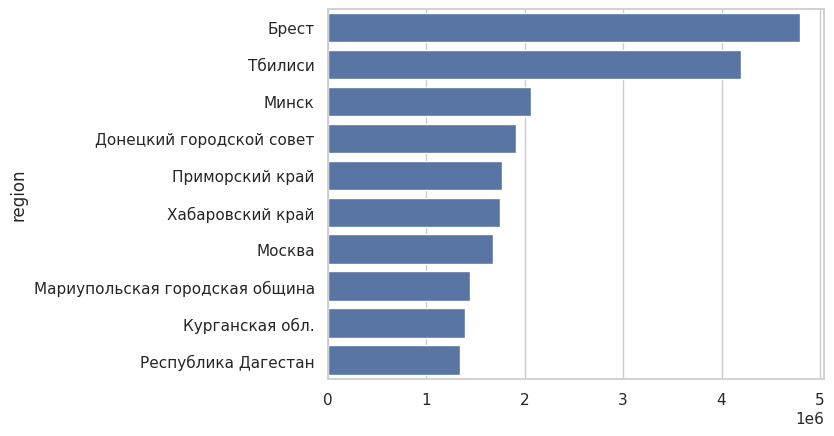

In [19]:
cars_df['region'] = cars_df['address'].apply(lambda x: x.split(',')[0])
region_prices = cars_df.groupby('region')['price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=region_prices.values, y=region_prices.index)

Чтобы понять, как пробег влияет на цену, можно построить диаграмму рассеяния с регрессионной линией.  
Такой анализ позволит бизнесу оценивать остаточную стоимость авто и выстраивать ценовую политику.


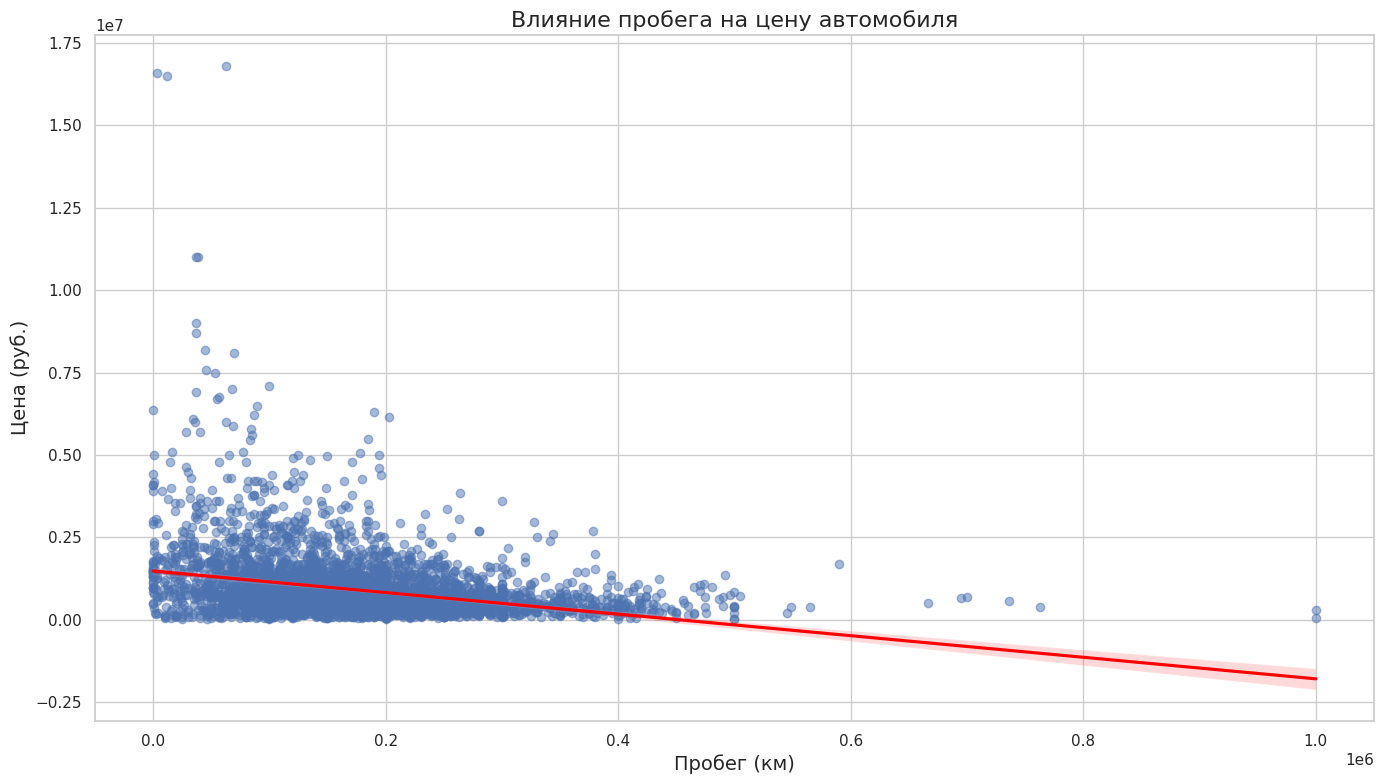

In [30]:
plt.figure(figsize=(14, 8))
sns.regplot(x="mileage (km)", y="price", data=cars_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Влияние пробега на цену автомобиля", fontsize=16)
plt.xlabel("Пробег (км)", fontsize=14)
plt.ylabel("Цена (руб.)", fontsize=14)
plt.tight_layout()
plt.show()

Анализ среднего значения цены по годам выпуска автомобиля покажет тренды рынка.


In [33]:
import plotly.express as px
import plotly.graph_objects as go

avg_price_by_year = cars_df.groupby("year")["price"].mean().reset_index()

fig = px.line(
    avg_price_by_year,
    x="year",
    y="price",
    markers=True,
    title="Динамика средней цены по году выпуска",
    labels={"year": "Год выпуска", "price": "Средняя цена (руб.)"},
    template="plotly_white"
)

fig.update_traces(line=dict(color="blue", width=3), hovertemplate="Год: %{x}<br>Цена: %{y:,.0f} руб.")

min_price = avg_price_by_year["price"].min()
max_price = avg_price_by_year["price"].max()
year_min = avg_price_by_year.loc[avg_price_by_year["price"].idxmin(), "year"]
year_max = avg_price_by_year.loc[avg_price_by_year["price"].idxmax(), "year"]

# Добавляем аннотации для минимальной и максимальной цены
fig.add_annotation(x=year_min, y=min_price,
                   text=f"Минимум: {min_price:,.0f} руб.",
                   showarrow=True, arrowhead=2,
                   ax=-40, ay=40)

fig.add_annotation(x=year_max, y=max_price,
                   text=f"Максимум: {max_price:,.0f} руб.",
                   showarrow=True, arrowhead=2,
                   ax=40, ay=-40)


fig.update_xaxes(dtick=1, tickangle=45)

fig.update_layout(
    hovermode="x unified",
    margin=dict(l=40, r=40, t=80, b=40)
)

fig.show()

Для автомобильного бизнеса важно понимать эффективность двигателя. Этот график демонстрирует корреляцию между объемом двигателя и мощностью, что может быть полезно для сегментации моделей и разработки маркетинговых стратегий.



In [37]:
# Построим диаграмму с регрессионными линиями для каждого типа двигателя
fig = px.scatter(
    cars_df,
    x="engine_volume",
    y="Horsepower",
    color="engine_type",
    opacity=0.7,
    trendline="ols",
    trendline_scope="trace",
    labels={
        "engine_volume": "Объем двигателя (л.)",
        "Horsepower": "Мощность (л.с.)",
        "engine_type": "Тип двигателя"
    },
    title="Связь объема двигателя и мощности",
    template="plotly_white"
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.update_layout(
    legend_title={"text": "Тип двигателя"},
    hovermode="closest",
    margin=dict(l=40, r=40, t=80, b=40)
)

fig.show()

Бизнес выводы:
1. Наблюдается явная положительная корреляция между объемом двигателя и мощностью – по мере увеличения объема двигателя повышается и мощность автомобиля.
2. Благодаря разделению по типам двигателя видно, что различные типы (например, бензиновые, дизельные и прочие) имеют свои закономерности даже при схожем объеме.
3. Регрессионные линии помогают оценить среднюю динамику для каждого типа; это может быть полезно для стратегического выбора ассортимента, ориентируясь на предпочтения целевой аудитории.
4. Анализируя диапазоны мощности при заданном объеме двигателя, можно более точно сегментировать предложения, оптимизировать ценовые категории и улучшать маркетинговые стратегии.

In [39]:
# Boxplot распределения мощности по типам двигателей

import plotly.express as px

fig1 = px.box(
    cars_df,
    x="engine_type",
    y="Horsepower",
    color="engine_type",
    labels={
        "engine_type": "Тип двигателя",
        "Horsepower": "Мощность (л.с.)"
    },
    title="Распределение мощности по типам двигателей"
)
fig1.update_layout(legend_title={"text": "Тип двигателя"}, template="plotly_white")
fig1.show()

Бизнес выводы для графика 1:
1. Видно, какие типы двигателей обладают наибольшим разбросом мощности; это позволяет выделить сегменты с более широким ассортиментом моделей.
2. Если для определенного типа наблюдается стабильность показателей, можно пересмотреть предложение моделей, ориентируясь на конкретный ценовой сегмент.

In [41]:
# распределения объемов двигателей для разных типов с помощью Violin Plot

fig2 = px.violin(
    cars_df,
    x="engine_type",
    y="engine_volume",
    color="engine_type",
    box=True,
    points="all",
    labels={
        "engine_type": "Тип двигателя",
        "engine_volume": "Объем двигателя (л.)"
    },
    title="Распределение объемов двигателей по типам"
)
fig2.update_layout(legend_title={"text": "Тип двигателя"}, template="plotly_white")
fig2.show()

Бизнес выводы для графика 2:
1. Видно, как распределяются объемы двигателей по типам:
определенные типы могут быть ориентированы на легковые автомобили, а другие – на грузовые или спортивные модели.
2. Анализ распределения помогает выявить узкие места в ассортименте, где можно расширить линейку по определенному объему для удовлетворения спроса.